In [15]:
#Start by specifying the cosmology
Omega_b = 0.022032
Omega_cdm = 0.12038
h = 0.67556 #H0/100
A_s = 2.215e-9
n_s = 0.9619
tau_reion = 0.079
neff=3.046

In [16]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.2 installed at /opt/intel/oneapi/intelpython/python3.7/lib/python3.7/site-packages/camb


In [95]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'sans-serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='small'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [7]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0 = h*100, ombh2 = Omega_b, omch2 = Omega_cdm,
                   tau=tau_reion, num_massive_neutrinos=0, mnu=0.0,standard_neutrino_neff=neff) #0.12038


#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.InitPower.set_params(As = A_s, ns = n_s, pivot_scalar = 0.05) #2.215e-9

#pars.set_for_lmax(2500, lens_potential_accuracy=0);
pars.set_for_lmax(4000, max_eta_k=12000, lens_potential_accuracy=4);


#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

Note: redshifts have been re-sorted (earliest first)


class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_lens
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 2.0
   k_per_logint = 0
   PK_num_redshifts = 2
   PK_redshifts = [0.8, 0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 4150
 max_l_tensor = 600
 max_eta_k = 72000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022032
 omch2 = 0.12038
 omk = 0.0
 omnuh2 = 0.0
 H0 = 67.55600000000001
 TCMB = 2.7255
 YHe = 0.24525805138337348
 num_nu_massless = 3.046
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.9619
   nrun = 0.0
   nrunrun = 0.0
   nt =

## get_matter_power_spectrum(minkh=0.0001, maxkh=1.0, npoints=100, var1=None, var2=None, have_power_spectra=False, params=None)

Calculates 𝑃𝑥𝑦(𝑘/h), where x, y are one of Transfer_cdm, Transfer_xx etc. The output k values are regu- larly log spaced and interpolated. If NonLinear is set, the result is non-linear.
For a description of outputs for different var1, var2 see Matter power spectrum and matter transfer function variables.
Parameters
  24
Chapter3. Calculationresults
PK = results.get_matter_power_interpolator();
print('Power spectrum at z=0.5, k/h=0.1 is %s (Mpc/h)^3 '%(PK.P(0.5, 0.1)))
 •
• • • •
* minkh – minimum value of k/h for output grid (very low values < 1e-4 may not be calcu- lated)
* maxkh – maximum value of k/h (check consistent with input params.Transfer.kmax) npoints – number of points equally spaced in log k
* var1 – variable i (index, or name of variable; default delta_tot)
* var2 – variable j (index, or name of variable; default delta_tot)

In [8]:
#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())


#Non-Linear spectra (Halofit)
#pars.NonLinear = model.NonLinear_both
#results.calc_power_spectra(pars)
#kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [9]:
print(results.get_sigma8())


[0.56455995 0.84865156]


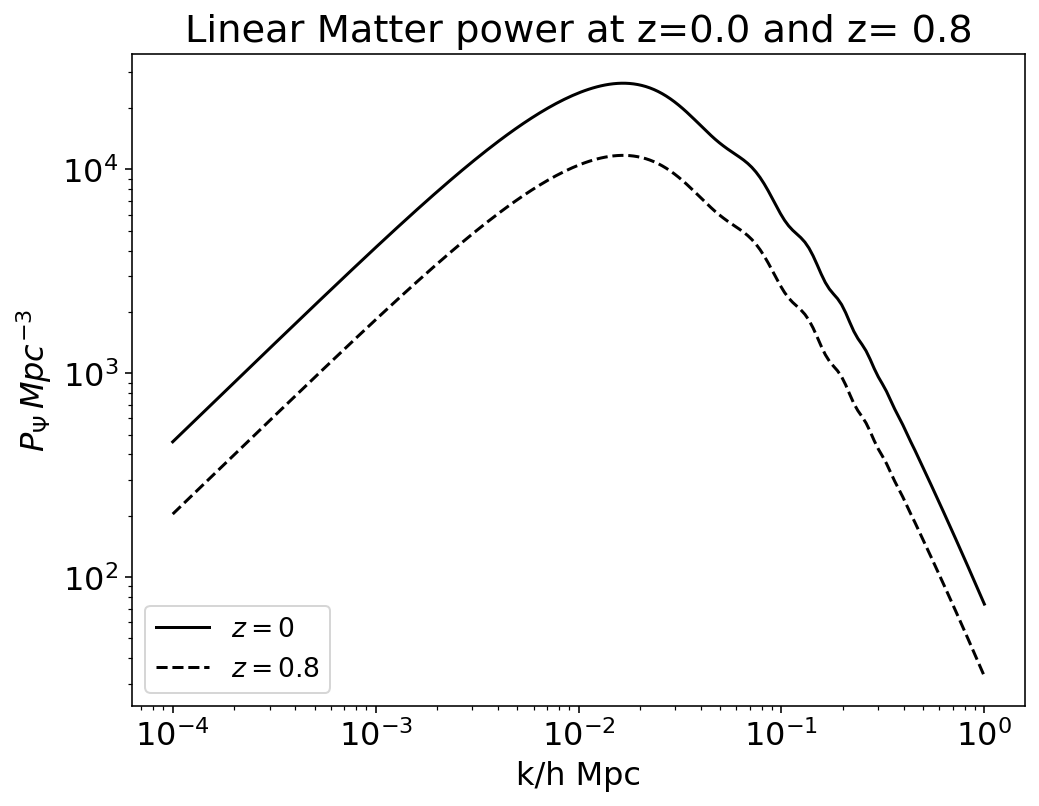

In [10]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    
plt.xlabel('k/h Mpc');
plt.ylabel('$P_\Psi\, Mpc^{-3}$')
plt.legend([r'$z = 0$',r'$z = 0.8$'], loc='lower left');
plt.title('Linear Matter power at z=%s and z= %s'%tuple(z));

In [11]:
PK = results.get_matter_power_interpolator(nonlinear=False);
print('Power spectrum at z=0.5, k/h=0.1 is %s (Mpc/h)^3 '%(PK.P(0.5, 0.1)))

Power spectrum at z=0.5, k/h=0.1 is 3576.403086095842 (Mpc/h)^3 


# Class 

In [12]:
from classy import Class

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'output': 'tCl lCl mPk',
    'l_max_scalars': 4000,
    'lensing': 'yes',
    'non linear': 'halofit',
    'omega_b' : Omega_b,
    'omega_cdm' : Omega_cdm,
    'h' : h,
    'ln10^{10}A_s' : np.log(10**10 *A_s),
    'n_s' : n_s,
    'tau_reio' : tau_reion,
    'N_eff': neff,
    'YHe' : 0.24,
    'N_ncdm' : 0,
    'halofit_k_per_decade' : 3000.,
    'l_switch_limber' : 40.,
    'accurate_lensing':1,
    'num_mu_minus_lmax' : 1000.,
    'delta_l_max' : 1000.,


}

k_max = 1;

#Initialize the cosmology andcompute everything
cosmo = Class()
cosmo.set(params)
cosmo.compute()

#Specify k and z
k = np.logspace(-5, np.log10(k_max), num=1000) #Mpc^-1
z = 0.

#Call these for the nonlinear and linear matter power spectra
Pnonlin = np.array([cosmo.pk(ki, z) for ki in k])
Plin = np.array([cosmo.pk_lin(ki, z) for ki in k])

#NOTE: You will need to convert these to h/Mpc and (Mpc/h)^3
#to use in the toolkit. To do this you would do:
k /= h
Plin *= h**3
Pnonlin *= h**3

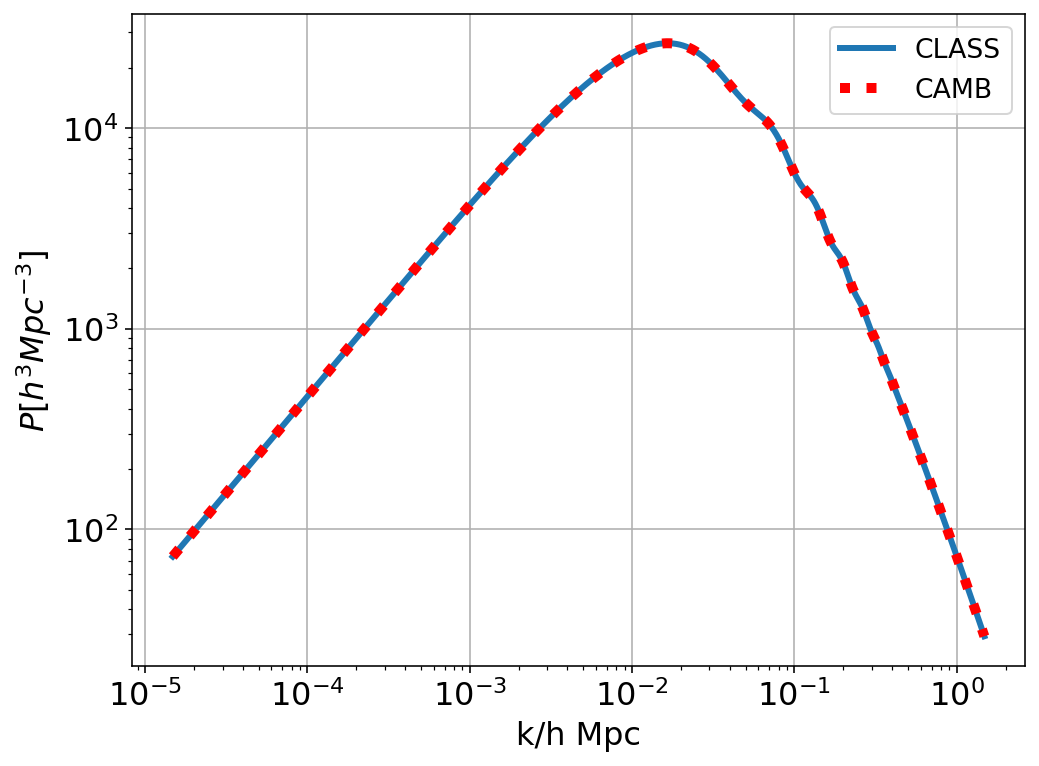

In [13]:
plt.xscale('log');
plt.yscale('log');
plt.plot(k, Plin, label='CLASS', linewidth=3)
#plt.plot(kh, pk[0,:], color='k', ls = line,label="CAMB",)
plt.plot(k,PK.P(0, k), color='r',label="CAMB",ls = 'dotted', linewidth=5)
plt.xlabel('k/h Mpc');
plt.ylabel('$P [ h^3 Mpc^{-3}]$')
plt.grid()
plt.legend()

# CLASS vs CAMB Comparisons 

## Initial Power Spectrum

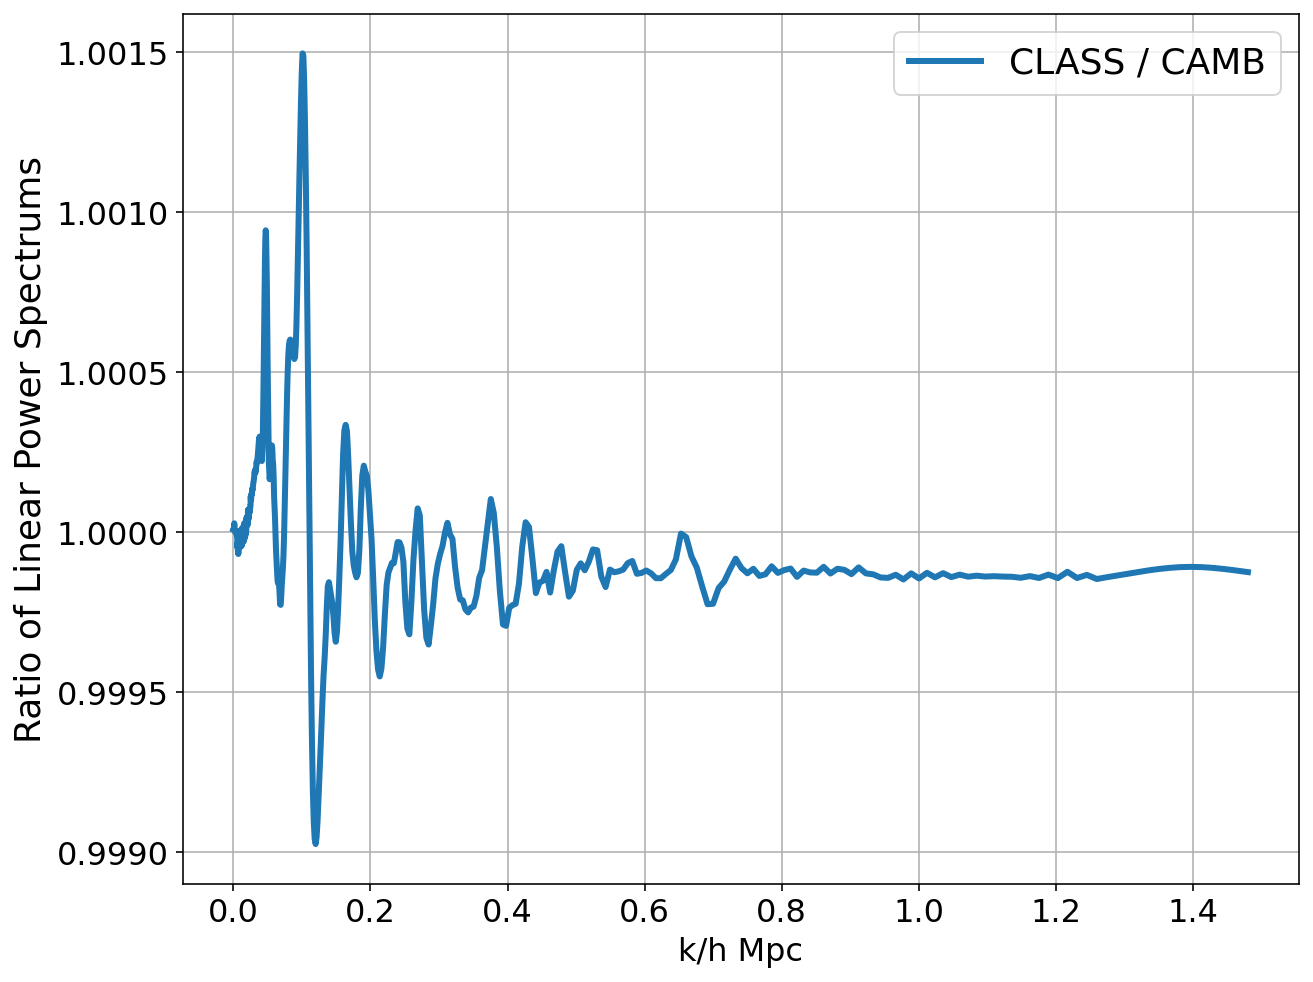

In [14]:
plt.figure(figsize=(10,8))
#plt.xscale('log')
#plt.yscale('log')
plt.plot(k, Plin/PK.P(0, k),label='CLASS / CAMB', linewidth=3)
plt.xlabel('k/h Mpc');
plt.ylabel('Ratio of Linear Power Spectrums', fontsize=18)
plt.grid()
plt.legend(fontsize=18)


# Compute Density from CLASS

In [15]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h': h,
                   'omega_b':Omega_b,
                   'omega_cdm': Omega_cdm,
        
                   'A_s':A_s,
                   'tau_reio': tau_reion,
                    'n_s':n_s}



# create instance of the class "Class"
DENSITY_CL_class = Class()
# pass input parameters
DENSITY_CL_class.set({'output':'tCl,nCl,sCl','number count contributions': 'density',
              'selection' : 'tophat','selection_mean' : '0.8',
               'selection_width' : '0.11','l_max_lss' : '1200',
             'l_switch_limber_for_nc_local_over_z' : '2','l_switch_limber_for_nc_los_over_z' :'2'})


DENSITY_CL_class.set(common_settings)

# run class
DENSITY_CL_class.compute()

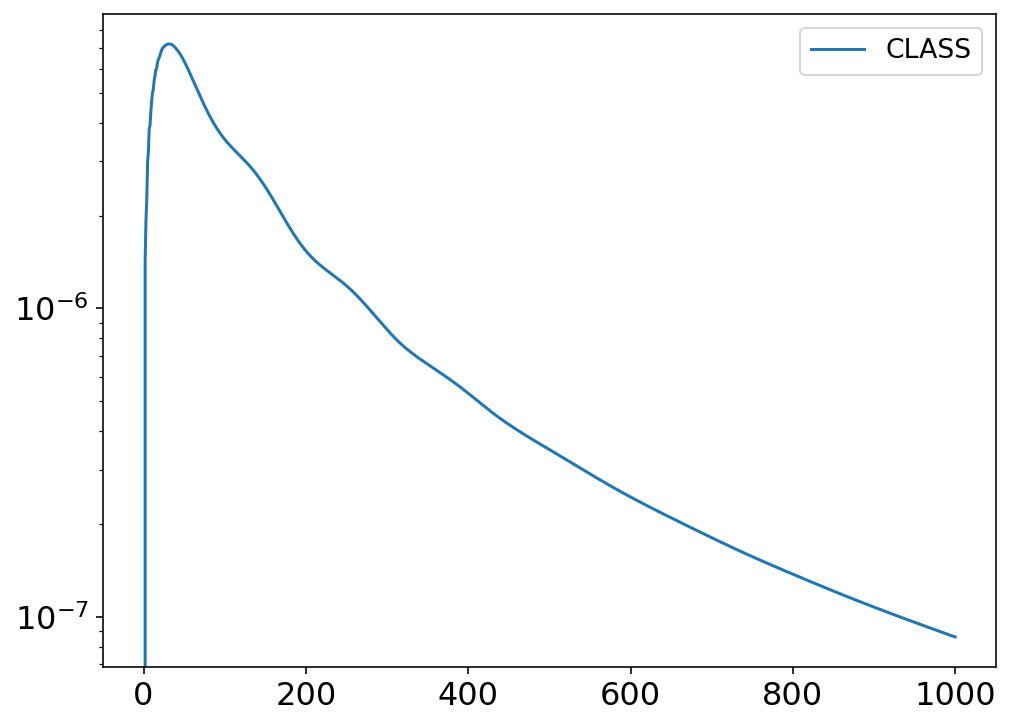

In [16]:
cls_dd_class=DENSITY_CL_class.density_cl(1000)

ll = cls_dd_class['ell']

cls_dd_class['dd'][0]


plt.figure()
#plt.xscale('log')
plt.yscale('log')
plt.plot(ll, cls_dd_class['dd'][0], label='CLASS')

plt.legend()

In [15]:
import h5py

filename = 'plin_z0.h5'

with h5py.File(filename, 'w') as hfile:

    hfile.create_dataset('Pk_z0_CLASS', data=Plin)
    hfile.create_dataset('Pk_z0_CAMB', data=PK.P(0, k))
    hfile.create_dataset('k', data=k)
    hfile.create_dataset('ll', data=ll)
    hfile.create_dataset('Cl_dd-Limber', data=cls_dd_class['dd'][0])

k.shape

(1000,)

## $C_{\ell}^{\delta\delta}$ from CAMB

In [62]:
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
lmax=1000
pars = camb.CAMBparams()

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0 = h*100, ombh2 = Omega_b, omch2 = Omega_cdm,
                   tau=tau_reion, num_massive_neutrinos=0, mnu=0.0,standard_neutrino_neff=neff) #0.12038


#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.InitPower.set_params(As = A_s, ns = n_s, pivot_scalar = 0.05) #2.215e-9

#pars.set_for_lmax(2500, lens_potential_accuracy=0);
pars.set_for_lmax(lmax, max_eta_k=12000, lens_potential_accuracy=4);


#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False 
# pars = camb.model.SourceTermParams()
pars.DoLensing = False
pars.SourceTerms.counts_density = True
pars.SourceTerms.counts_velocity = False
pars.SourceTerms.counts_lensing = False
pars.SourceTerms.counts_redshift = False 
pars.SourceTerms.counts_ISW = False
pars.SourceTerms.line_distortions = False
pars.SourceTerms.counts_timedelay =False
pars.SourceTerms.counts_potential = False
pars.SourceTerms.line_basic = False
pars.SourceTerms.limber_windows = False
pars.use_cl_spline_template = False
pars.Transfer.high_precision = True

#Limber parameters
pars.SourceTerms.limber_windows = True

#limber_phi_lmin–(integer)Whenlimber_windows=True,theminimumLtouseLimber approximation for the lensing 
#potential and other sources (which may use higher but not lower)
pars.SourceTerms.limber_phi_lmin = 2000;


# Accuracy Parameters: 

pars.Accuracy.LimberBoost =4.0;
pars.Accuracy.SourceLimberBoost = 2000.0


#---
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_none
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
#pars.SourceWindows = [
#    GaussianSourceWindow(redshift=, source_type='counts', bias=1., sigma=0.05),
#    GaussianSourceWindow(redshift=1.1, source_type='counts', bias=1., sigma=0.05)]

pars.SourceWindows = [
    GaussianSourceWindow(redshift=0.8, source_type='counts', bias=1., sigma=0.05)]

results = camb.get_results(pars)
cls_dens_only = results.get_source_cls_dict()

ls=  np.arange(2, lmax+1)



In [63]:
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
lmax=1000
pars1 = camb.CAMBparams()

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars1.set_cosmology(H0 = h*100, ombh2 = Omega_b, omch2 = Omega_cdm,
                   tau=tau_reion, num_massive_neutrinos=0, mnu=0.0,standard_neutrino_neff=neff) #0.12038


#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars1.InitPower.set_params(As = A_s, ns = n_s, pivot_scalar = 0.05) #2.215e-9

#pars.set_for_lmax(2500, lens_potential_accuracy=0);
pars1.set_for_lmax(lmax, max_eta_k=12000, lens_potential_accuracy=4);


#set Want_CMB to true if you also want CMB spectra or correlations
pars1.Want_CMB = False 
# pars = camb.model.SourceTermParams()
pars1.DoLensing = False
pars1.SourceTerms.counts_density = True
pars1.SourceTerms.counts_velocity = False
pars1.SourceTerms.counts_lensing = False
pars1.SourceTerms.counts_redshift = False 
pars1.SourceTerms.counts_ISW = False
pars1.SourceTerms.line_distortions = False
pars1.SourceTerms.counts_timedelay =False
pars1.SourceTerms.counts_potential = False
pars1.SourceTerms.line_basic = False
pars1.SourceTerms.limber_windows = False
pars1.use_cl_spline_template = False
pars1.Transfer.high_precision = True

#Limber parameters
pars1.SourceTerms.limber_windows = True

#limber_phi_lmin–(integer)Whenlimber_windows=True,theminimumLtouseLimber approximation for the lensing 
#potential and other sources (which may use higher but not lower)
pars1.SourceTerms.limber_phi_lmin = 20;


# Accuracy Parameters: 

pars1.Accuracy.LimberBoost =4.0;
pars1.Accuracy.SourceLimberBoost = 20.0


#---
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars1.NonLinear = model.NonLinear_none
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
#pars.SourceWindows = [
#    GaussianSourceWindow(redshift=, source_type='counts', bias=1., sigma=0.05),
#    GaussianSourceWindow(redshift=1.1, source_type='counts', bias=1., sigma=0.05)]

pars1.SourceWindows = [
    GaussianSourceWindow(redshift=0.8, source_type='counts', bias=1., sigma=0.05)]

results1 = camb.get_results(pars1)
cls_dens_only_1 = results1.get_source_cls_dict()

ls=  np.arange(2, lmax+1)




## $C_{\ell}^{\delta\delta}$ from CLASS

In [58]:
#Start by specifying the cosmology
Omega_b = 0.022032
Omega_cdm = 0.12038
h = 0.67556 #H0/100
A_s = 2.215e-9
n_s = 0.9619
tau_reion = 0.079
neff=3.046

#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h': h,
                   'omega_b':Omega_b,
                   'omega_cdm': Omega_cdm,
                   'A_s':A_s,
                   'tau_reio':tau_reion,
                    'n_s':n_s}

# create instance of the class "Class"
DENSITY_CL_class = Class()
# pass input parameters
DENSITY_CL_class.set({'output':'tCl,nCl','number count contributions': 'density',
              'selection' : 'gaussian','selection_mean' : '0.8',
                      'selection_bias':'1',
              'selection_width' : '0.05','l_max_lss' : '1000','l_switch_limber_for_nc_local_over_z': '2000',
                     'l_switch_limber_for_nc_los_over_z' : '2000'})




DENSITY_CL_class.set(common_settings)

# run class
DENSITY_CL_class.compute()

cls_dd_class=DENSITY_CL_class.density_cl(1000)

ll = cls_dd_class['ell']


In [55]:

#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h': h,
                   'omega_b':Omega_b,
                   'omega_cdm': Omega_cdm,
                   'A_s':A_s,
                   'tau_reio':tau_reion,
                    'n_s':n_s}

# create instance of the class "Class"
DENSITY_CL_class1 = Class()
# pass input parameters
DENSITY_CL_class1.set({'output':'tCl,nCl','number count contributions': 'density',
              'selection' : 'gaussian','selection_mean' : '0.8',
                      'selection_bias':'1',
              'selection_width' : '0.05','l_max_lss' : '1000','l_switch_limber_for_nc_local_over_z': '20',
                     'l_switch_limber_for_nc_los_over_z' : '20'})




DENSITY_CL_class1.set(common_settings)

# run class
DENSITY_CL_class1.compute()

cls_dd_class_1=DENSITY_CL_class1.density_cl(1000)

ll = cls_dd_class['ell']


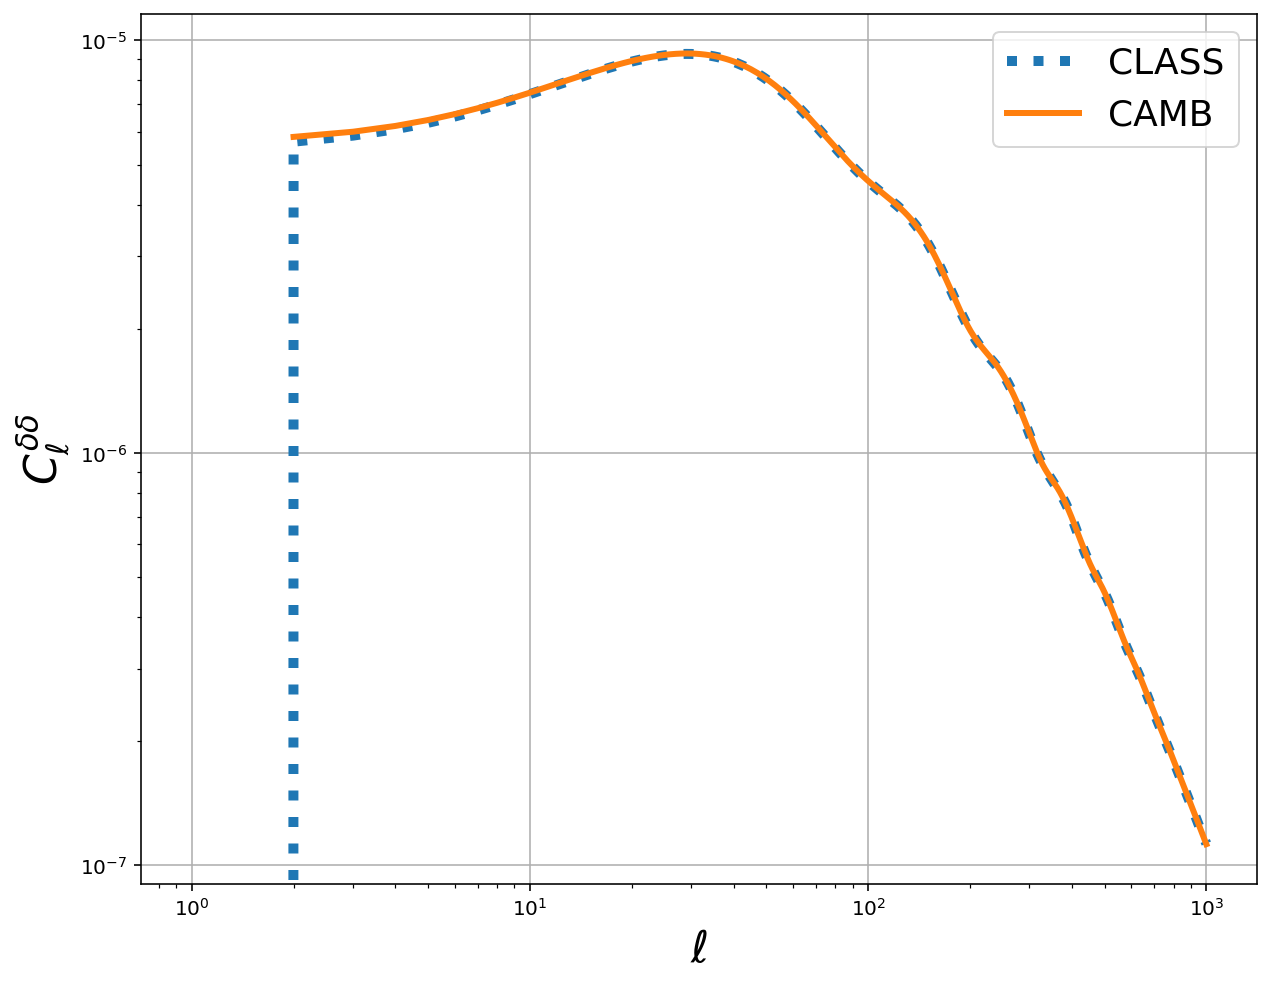

In [64]:
plt.figure(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
plt.plot(ll, cls_dd_class['dd'][0], label='CLASS', linewidth=5, linestyle='dotted')
plt.plot(ls, np.abs(cls_dens_only['W1xW1'][2:lmax+1]/ (ls*(ls+1)/(2*np.pi))), label='CAMB', linewidth=3)
plt.xlabel(r'$\ell$', fontsize=22)
plt.ylabel(r'$C_{\ell}^{\delta\delta}$', fontsize=22)
plt.grid()
plt.legend(fontsize=18)

In [ ]:
ls/ll[2:]

plt.figure(figsize=(10,8))
#plt.xscale('log')
plt.yscale('log')
plt.plot(ll[2:], cls_dd_class['dd'][0][2:]/np.abs(cls_dens_only['W1xW1'][2:lmax+1]/ (ls*(ls+1)/(2*np.pi))), label='CLASS /CAMB', linewidth=3, color='r')

plt.xlabel(r'$\ell$', fontsize=22)
plt.ylabel(r'Ratio of $C_{\ell}^{\delta\delta}$', fontsize=22)
plt.grid()
plt.legend(fontsize=18)

/opt/intel/oneapi/intelpython/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/intel/oneapi/intelpython/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


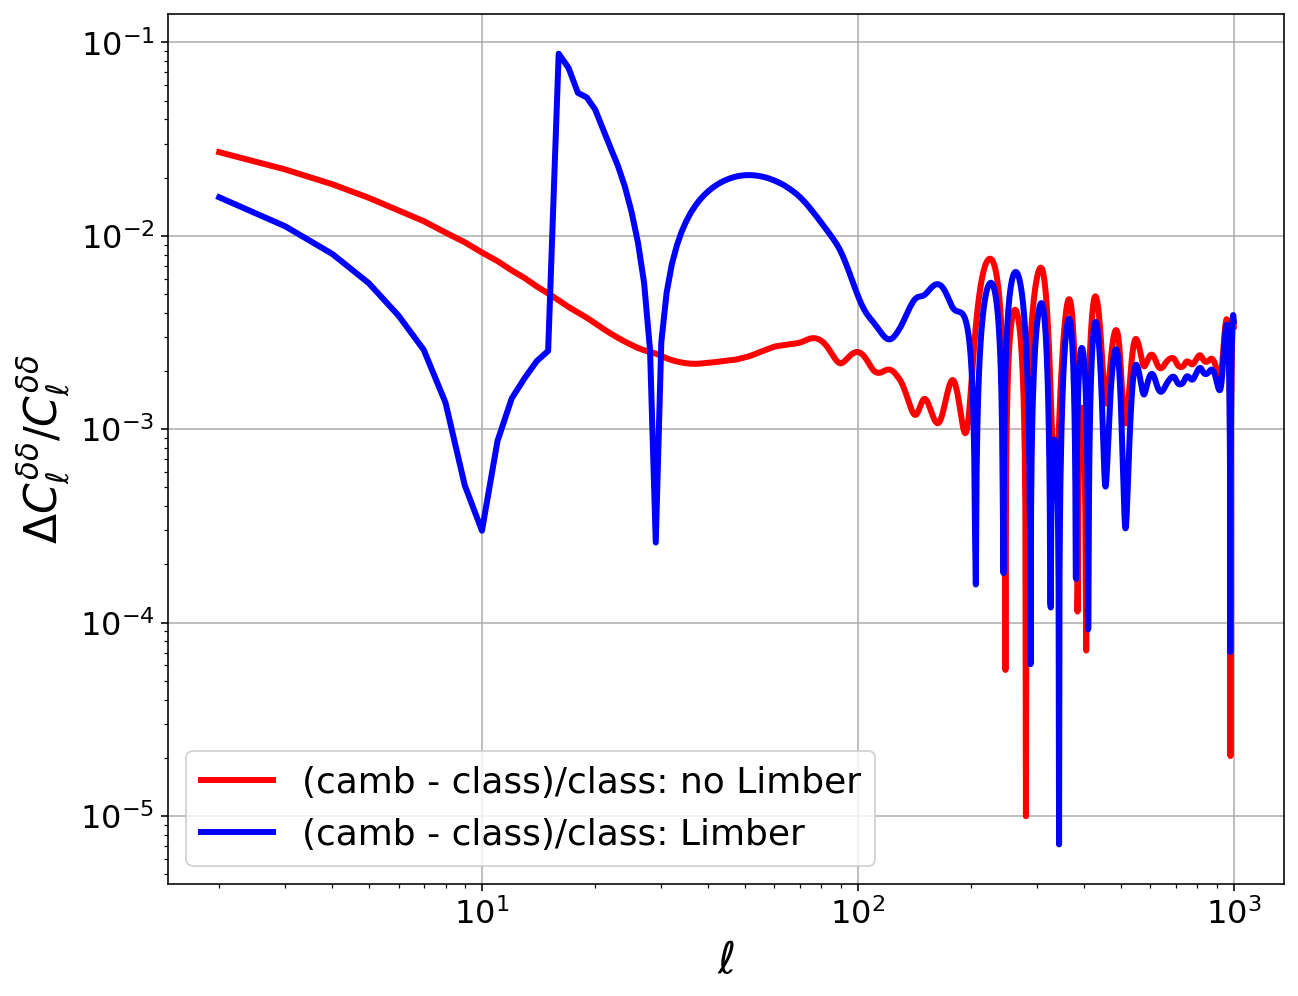

In [23]:
camb_cl = cls_dens_only['W1xW1'][2:lmax+1]/ (ls*(ls+1)/(2*np.pi))
class_cl = cls_dd_class['dd'][0][2:]


camb_cl_1 = cls_dens_only_1['W1xW1'][2:lmax+1]/ (ls*(ls+1)/(2*np.pi))
class_cl_1 = cls_dd_class_1['dd'][0][2:]


plt.figure(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
plt.plot(ll[2:], np.abs((camb_cl - class_cl)/class_cl), label='(camb - class)/class: no Limber', linewidth=3, color='r')
plt.plot(ll[2:], np.abs((camb_cl_1 - class_cl_1)/class_cl_1), label='(camb - class)/class: Limber', linewidth=3, color='b')


plt.xlabel(r'$\ell$', fontsize=22)
plt.ylabel(r'$\Delta C_{\ell}^{\delta\delta} / C^{\delta\delta}_{\ell}$', fontsize=22)
plt.grid()
plt.legend(fontsize=18)

## Cosmolgoy Comparison


In [68]:
#CLASS
from scipy.interpolate import interp1d

background  = DENSITY_CL_class1.get_background()
# comivng distance is in units Mpc
comoving_dist = background['comov. dist.']
ztab = background['z']

# interpolation function of comoving distance
comoving_dist_intp = interp1d(ztab,comoving_dist,kind='cubic')

Hubble = background['H [1/Mpc]']
Hubble_intp = interp1d(ztab,Hubble,kind='cubic')

growth_factor = background['gr.fac. D']
growth_factor_intp = interp1d(ztab,growth_factor,kind='cubic')

/opt/intel/oneapi/intelpython/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


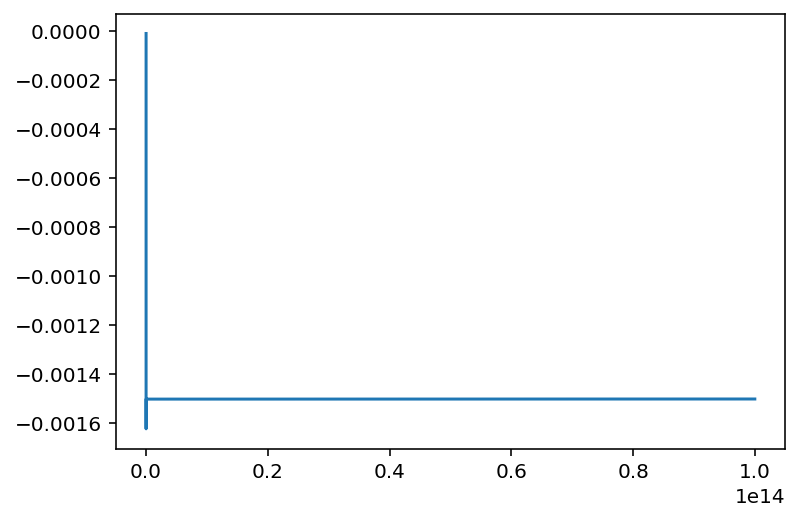

In [74]:
#CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
pars.InitPower.set_params(ns=0.965)
#
#For Limber result, want integration over \chi (comoving radial distance), from 0 to chi_*.
#so get background results to find chistar, set up a range in chi, and calculate corresponding redshifts
results= camb.get_background(pars)

results.comoving_radial_distance(ztab)

#plt.plot(ztab, comoving_dist_intp(ztab))
plt.plot(ztab, (results.comoving_radial_distance(ztab)-comoving_dist_intp(ztab))/comoving_dist_intp(ztab))

# Now do integral to get convergence power spectrum, using the Limber approximation

$C_{\ell}^{\kappa} = \ell(\ell+1)^2\int_{0}^{\chi_*}d\chi\Bigg(\frac{\chi_* - \chi}{\chi^2\chi_*}\Bigg)^2P\Big(\frac{\ell+0.5}{\chi},z\Big)$




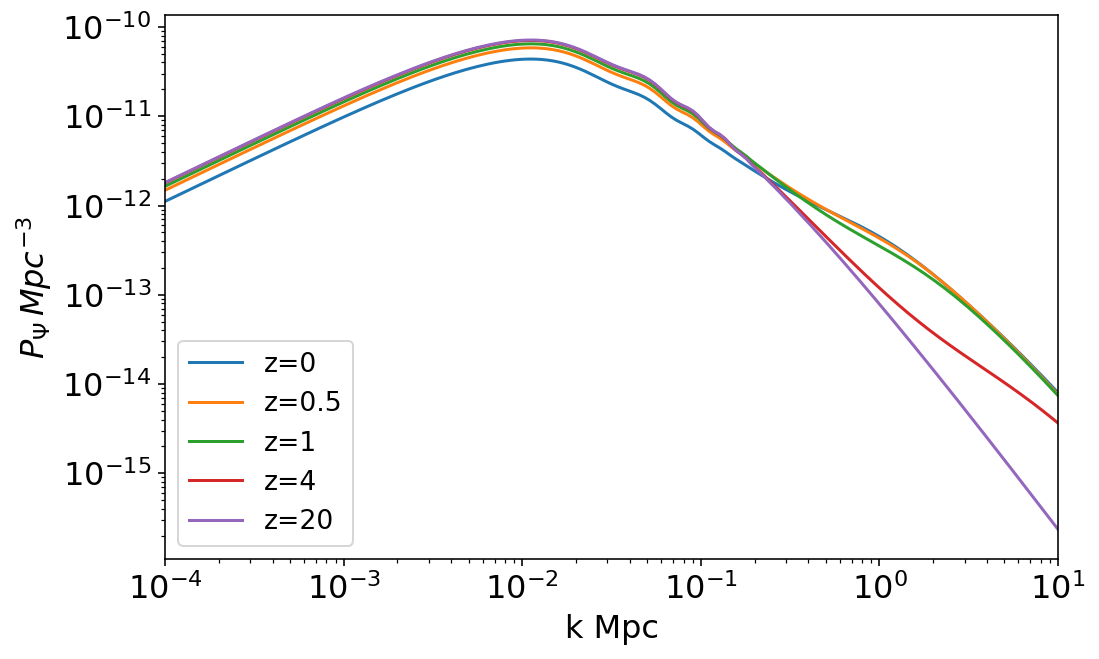

In [24]:
#For calculating large-scale structure and lensing results yourself, get a power spectrum
#interpolation object. In this example we calculate the CMB lensing potential power
#spectrum using the Limber approximation, using PK=camb.get_matter_power_interpolator() function.
#calling PK(z, k) will then get power spectrum at any k and redshift z in range.

nz = 100 #number of steps to use for the radial/redshift integration
kmax=10  #kmax to use
#First set up parameters as usual
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0 = h*100, ombh2 = Omega_b, omch2 = Omega_cdm,
                   tau=tau_reion, num_massive_neutrinos=0, mnu=0.0,standard_neutrino_neff=neff) #0.12038

pars.InitPower.set_params(ns=n_s)


#For Limber result, want integration over \chi (comoving radial distance), from 0 to chi_*.
#so get background results to find chistar, set up a range in chi, and calculate corresponding redshifts
results= camb.get_background(pars)
chistar = results.conformal_time(0)- results.tau_maxvis
chis = np.linspace(0,chistar,nz)
zs=results.redshift_at_comoving_radial_distance(chis)
#Calculate array of delta_chi, and drop first and last points where things go singular
dchis = (chis[2:]-chis[:-2])/2
chis = chis[1:-1]
zs = zs[1:-1]

#Get the matter power spectrum interpolation object (based on RectBivariateSpline). 
#Here for lensing we want the power spectrum of the Weyl potential.
PK = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs[-1])

#Have a look at interpolated power spectrum results for a range of redshifts
#Expect linear potentials to decay a bit when Lambda becomes important, and change from non-linear growth
plt.figure(figsize=(8,5))
k=np.exp(np.log(10)*np.linspace(-4,2,200))
zplot = [0, 0.5, 1, 4 ,20]
for z in zplot:
    plt.loglog(k, PK.P(z,k))
plt.xlim([1e-4,kmax])
plt.xlabel('k Mpc')
plt.ylabel('$P_\Psi\, Mpc^{-3}$')
plt.legend(['z=%s'%z for z in zplot]);







#Compare with CAMB's calculation:
#note that to get CAMB's internal calculation accurate at the 1% level at L~2000, 
#need lens_potential_accuracy=2. Increase to 4 for accurate match to the Limber calculation here
pars.set_for_lmax(2500,lens_potential_accuracy=2)
results = camb.get_results(pars)
cl_camb=results.get_lens_potential_cls(2500)

In [25]:
#Get lensing window function (flat universe)
win = ((chistar-chis)/(chis**2*chistar))**2
#Do integral over chi
ls = np.arange(2,2500+1, dtype=np.float64)
cl_kappa=np.zeros(ls.shape)
w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2

/opt/intel/oneapi/intelpython/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


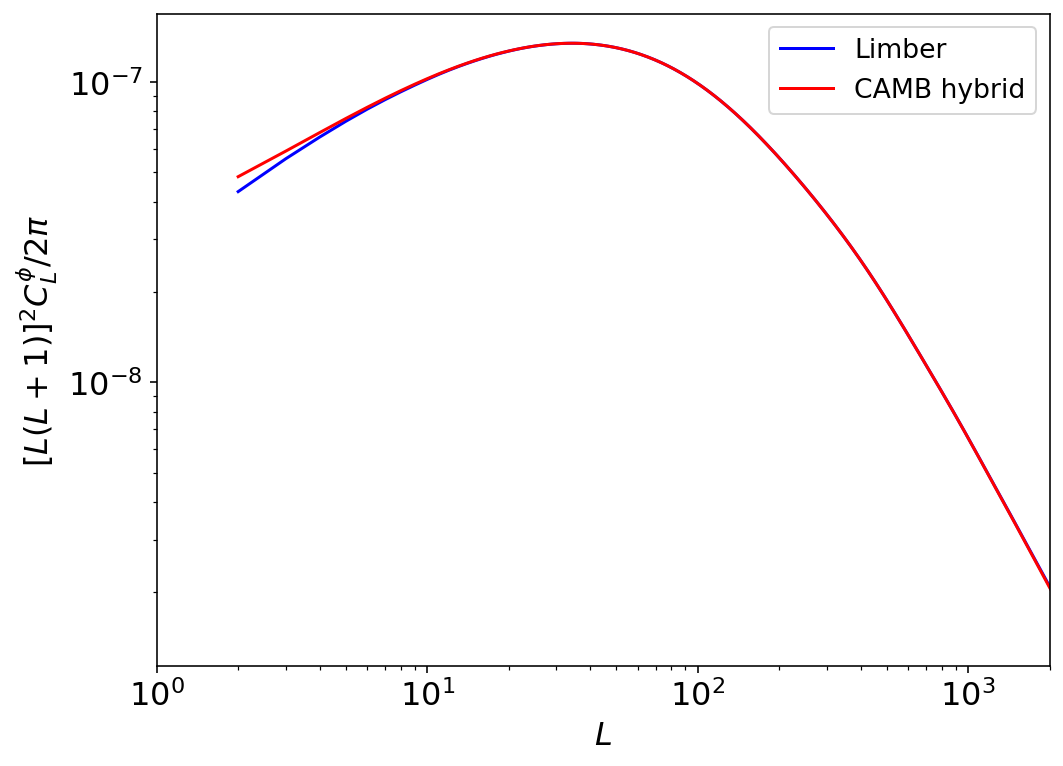

In [27]:
#Compare with CAMB's calculation:
#note that to get CAMB's internal calculation accurate at the 1% level at L~2000, 
#need lens_potential_accuracy=2. Increase to 4 for accurate match to the Limber calculation here
pars.set_for_lmax(2500,lens_potential_accuracy=2)
results = camb.get_results(pars)
cl_camb=results.get_lens_potential_cls(2500)
#cl_camb[:,0] is phi x phi power spectrum (other columns are phi x T and phi x E)

#Make plot. Expect difference at very low-L from inaccuracy in Limber approximation, and
#very high L from differences in kmax (lens_potential_accuracy is only 2, though good by eye here)
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
plt.loglog(ls,cl_limber, color='b')
plt.loglog(np.arange(2,cl_camb[:,0].size),cl_camb[2:,0], color='r')
plt.xlim([1,2000])
plt.legend(['Limber','CAMB hybrid'])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.xlabel('$L$');

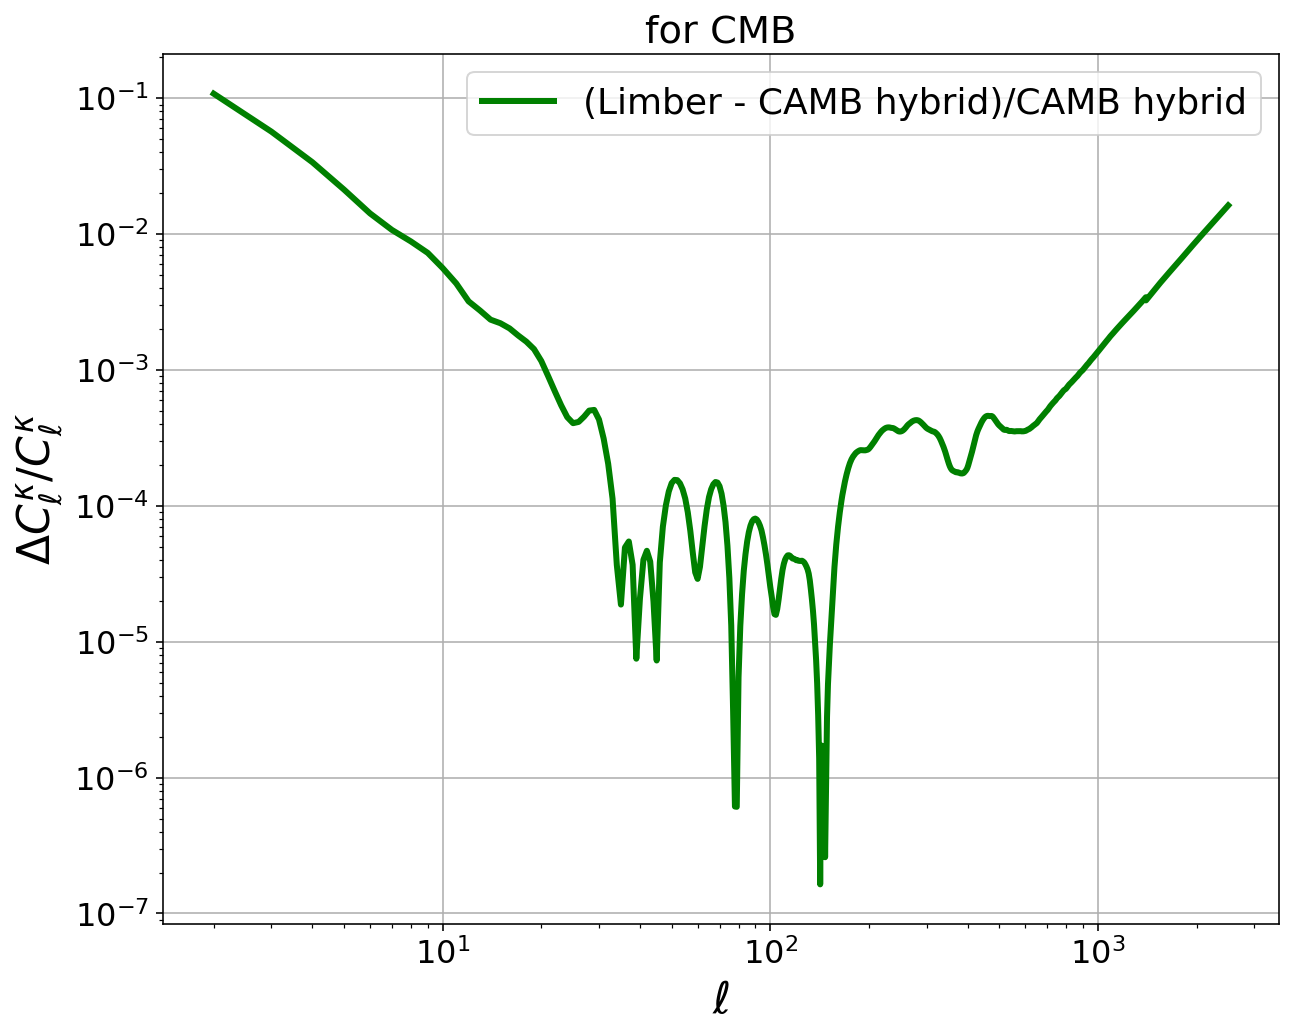

In [28]:
from scipy.interpolate import interp1d

Cl_limber_int = interp1d(ls, cl_limber, kind='nearest')

ratio = (Cl_limber_int(np.arange(2,cl_camb[:,0].size)) - cl_camb[2:,0])/cl_camb[2:,0]


plt.figure(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
plt.plot(np.arange(2,cl_camb[:,0].size), np.abs(ratio), label='(Limber - CAMB hybrid)/CAMB hybrid', linewidth=3, color='g')


plt.xlabel(r'$\ell$', fontsize=22)
plt.ylabel(r'$\Delta C^{\kappa}_{\ell} / C^{\kappa}_{\ell}$', fontsize=22)
plt.grid()
plt.title('for CMB')
plt.legend(fontsize=18)

In [29]:
import numpy as np
import h5py

filename = "/Users/muntazirabidi/Dropbox/Postdoc2020/GIMCO/EG_GIMCO/CLASS-CAMB/ClddGauss.h5"

with h5py.File(filename, 'r') as hfile:

    Cldd_analytical = hfile['ClddGauss'][:]
    lTab = hfile['lTab'][:]
    

# $C_{\ell}^{\delta \kappa}$ : Lensing x density 

## CLASS

In [ ]:
from classy import Class

omch2 = 0.12038
ombh2 = 0.022032
h = 0.67556 #H0/100
cspeed = 299792.458 # km/s
A_s = 2.215e-9
n_s = 0.9619
tau_reion = 0.079
neff=3.046

H0 = 67.556  # km/s/Mpc

#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h': h,
                   'omega_b':ombh2,
                   'omega_cdm': omch2,
                    'tau_reio' : tau_reion,
                    'N_eff': neff,
                    'YHe' : 0.24,
                    'N_ncdm' : 0,
                    'A_s':A_s,
                    'tau_reio': tau_reion,
                    'n_s':n_s}

mu_z1    = 0.8
sigma_z1 = 0.1
# redshift bin 2
mu_z2    = 1.2
sigma_z2 = 0.1

# create instance of the class "Class"
KD_CL_class = Class()
# pass input parameters
KD_CL_class.set({'output':'nCl,sCl','number count contributions': 'density',
              'selection' : 'gaussian','selection_mean' : '0.8, 1.2',
               'selection_width' : '0.05, 0.05','l_max_lss' : '1200',
             'l_switch_limber_for_nc_local_over_z' : '2','l_switch_limber_for_nc_los_over_z' :'2',
                'non_diagonal' : '1'})


KD_CL_class.set(common_settings)
# run class
KD_CL_class.compute()

In [ ]:
cls_lensing_density=KD_CL_class.density_cl(1000)

ll = cls_lensing_density['ell']

cls_lensing_density

In [114]:
from classy import Class

omch2 = 0.12038
ombh2 = 0.022032
h = 0.67556 #H0/100
cspeed = 299792.458 # km/s
A_s = 2.215e-9
n_s = 0.9619
tau_reion = 0.079
neff=3.046

H0 = 67.556  # km/s/Mpc

#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h': h,
                   'omega_b':ombh2,
                   'omega_cdm': omch2,
        
                   'A_s':A_s,
                   'tau_reio': tau_reion,
                    'n_s':n_s}

mu_z1    = 0.8
sigma_z1 = 0.1
# redshift bin 2
mu_z2    = 1.2
sigma_z2 = 0.1

# create instance of the class "Class"
DD_CL_class = Class()
# pass input parameters
DD_CL_class.set({'output':'nCl','number count contributions': 'density',
              'selection' : 'gaussian','selection_mean' : '0.8, 1.2',
               'selection_width' : '0.05, 0.05','l_max_lss' : '1200',
             'l_switch_limber_for_nc_local_over_z' : '2','l_switch_limber_for_nc_los_over_z' :'2',
                'non_diagonal' : '1'})


DD_CL_class.set(common_settings)
# run class
DD_CL_class.compute()




# create instance of the class "Class"
DL_CL_class = Class()
# pass input parameters
DL_CL_class.set({'output':'nCl','number count contributions': 'density, lensing',
              'selection' : 'gaussian','selection_mean' : '0.8, 1.2',
               'selection_width' : '0.05, 0.05','l_max_lss' : '1200',
             'l_switch_limber_for_nc_local_over_z' : '2','l_switch_limber_for_nc_los_over_z' :'2',
                'non_diagonal' : '1'})


DL_CL_class.set(common_settings)
# run class
DL_CL_class.compute()


# create instance of the class "Class"
LL_CL_class = Class()
# pass input parameters
LL_CL_class.set({'output':'nCl','number count contributions': 'lensing',
              'selection' : 'gaussian','selection_mean' : '0.8, 1.2',
               'selection_width' : '0.05, 0.05','l_max_lss' : '1200',
             'l_switch_limber_for_nc_local_over_z' : '2','l_switch_limber_for_nc_los_over_z' :'2',
                'non_diagonal' : '1'})


LL_CL_class.set(common_settings)
# run class
LL_CL_class.compute()

In [125]:
cls_density=DD_CL_class.density_cl(1000)

cls_densityLensing=DL_CL_class.density_cl(1000)

cls_Lensing=LL_CL_class.density_cl(1000)

cls_kappa_density = (cls_densityLensing['dd'][1] - cls_Lensing['dd'][1] - cls_density['dd'][1])/2


## CAMB

In [209]:
omch2 = 0.12038
ombh2 = 0.022032
omnuh2 = 0
h = 0.67556 #H0/100
cspeed = 299792.458 # km/s
A_s = 2.215e-9
n_s = 0.9619
tau_reion = 0.079
neff=3.046
nu_massless_nu = 2.0328

H0 = 67.556  # km/s/Mpc

#camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2,As=A_s, ns=n_s,tau=tau_reion, omnuh2=omnuh2,
#               num_nu_massless = nu_massless_nu)


pars = camb.CAMBparams()
pars.set_cosmology(H0 = h*100, ombh2 = Omega_b, omch2 = Omega_cdm,
                   tau=tau_reion, num_massive_neutrinos=0, mnu=0.0,standard_neutrino_neff=neff) #0.12038


#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.InitPower.set_params(As = A_s, ns = n_s, pivot_scalar = 0.05) #2.215e-9
#
#For Limber result, want integration over \chi (comoving radial distance), from 0 to chi_*.
#so get background results to find chistar, set up a range in chi, and calculate corresponding redshifts
results= camb.get_background(pars)

#Get angular power spectrum for galaxy number counts and lensing
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
#
pars.set_for_lmax(ellmax, lens_potential_accuracy=2)
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False
#NonLinear_both or NonLinear_lens will use non-linear corrections
#pars.NonLinear = model.NonLinear_both
pars.NonLinear = model.NonLinear_none
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [
    GaussianSourceWindow(redshift=mu_z1, source_type='counts', bias=1.0, sigma=sigma_z1, dlog10Ndm=0.4),
    GaussianSourceWindow(redshift=mu_z2, source_type='lensing', sigma=sigma_z2)]
#
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
clx = cls['W1xW2']
ls=  np.arange(2, ellmax+1)

In [164]:
pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = False
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2150
 max_l_tensor = 600
 max_eta_k = 36000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022032
 omch2 = 0.12038
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 67.556
 TCMB = 2.7255
 YHe = 0.24525805138337348
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.9619

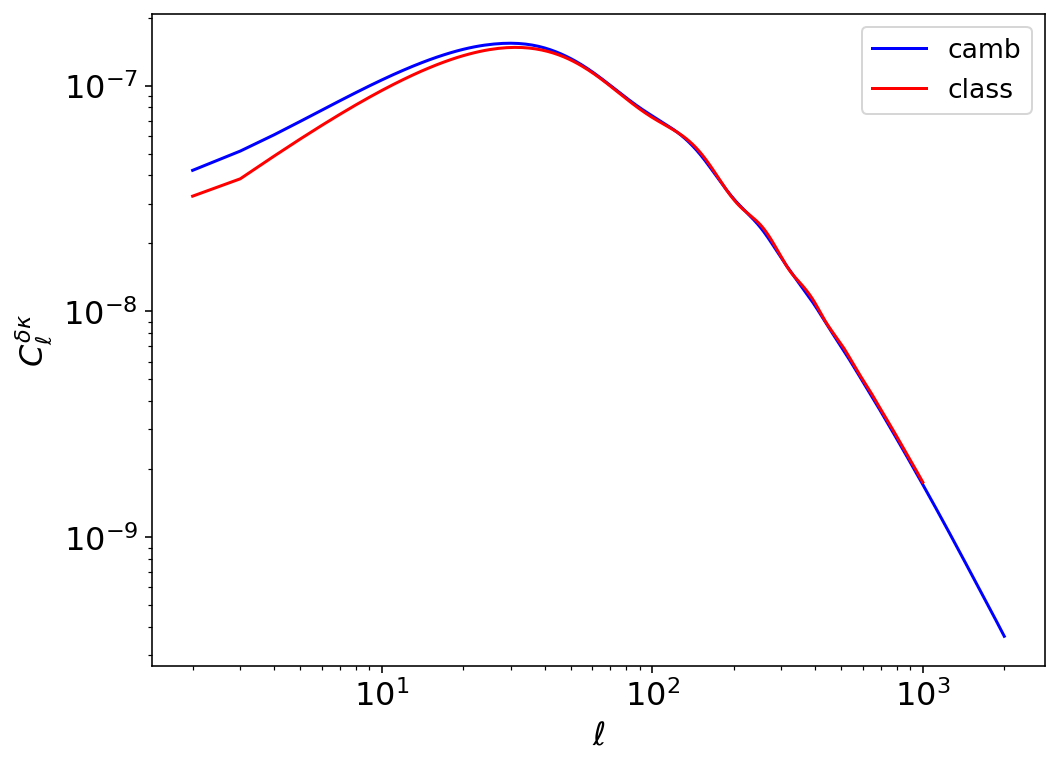

In [210]:

plt.loglog(ls[:2000], cls['W1xW2'][2:2001]/(ls[:2000]*(ls[:2000]+1.0))*2.0*np.pi, color='b',label='camb')
plt.plot(ll[2:],(ll[2:]*(ll[2:]+1))*cls_lensing_density['dl'][1][2:]/2,color='r',label='class')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\delta\kappa}$')
plt.legend()


Checking lensing x density from CLASS using only the number counts. In the output we have used ncl, and for the number counts we have used density only, density + lensing and lensing only. We compute the density lensing cross correlation from these three correlations. 


- Lensing in ClASS is the same if we use nCl, sCl in the output and only density in the number counts OR if we use only nCl and include lensing in the number counts

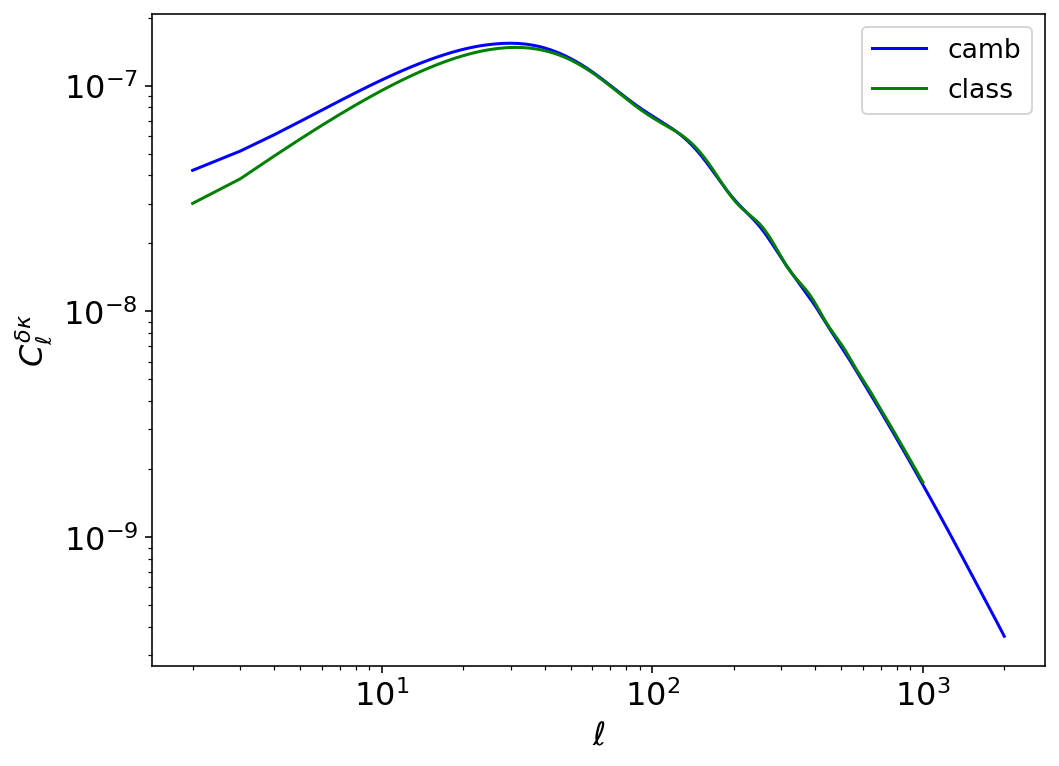

In [211]:



plt.loglog(ls[:2000], cls['W1xW2'][2:2001]/(ls[:2000]*(ls[:2000]+1.0))*2.0*np.pi, color='b',label='camb')
plt.plot(ll[2:],np.abs(cls_kappa_density)[2:],color='g',label='class')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\delta\kappa}$')
plt.legend()



In [214]:
cl1 = cls['W1xW2'][2:2001]/(ls[:2000]*(ls[:2000]+1.0))*2.0*np.pi
cl_dl_f = interp1d(l1,cl1,kind='cubic')

cl_dl_intp = cl_dl_f(ll[10:])
#ll[2:]

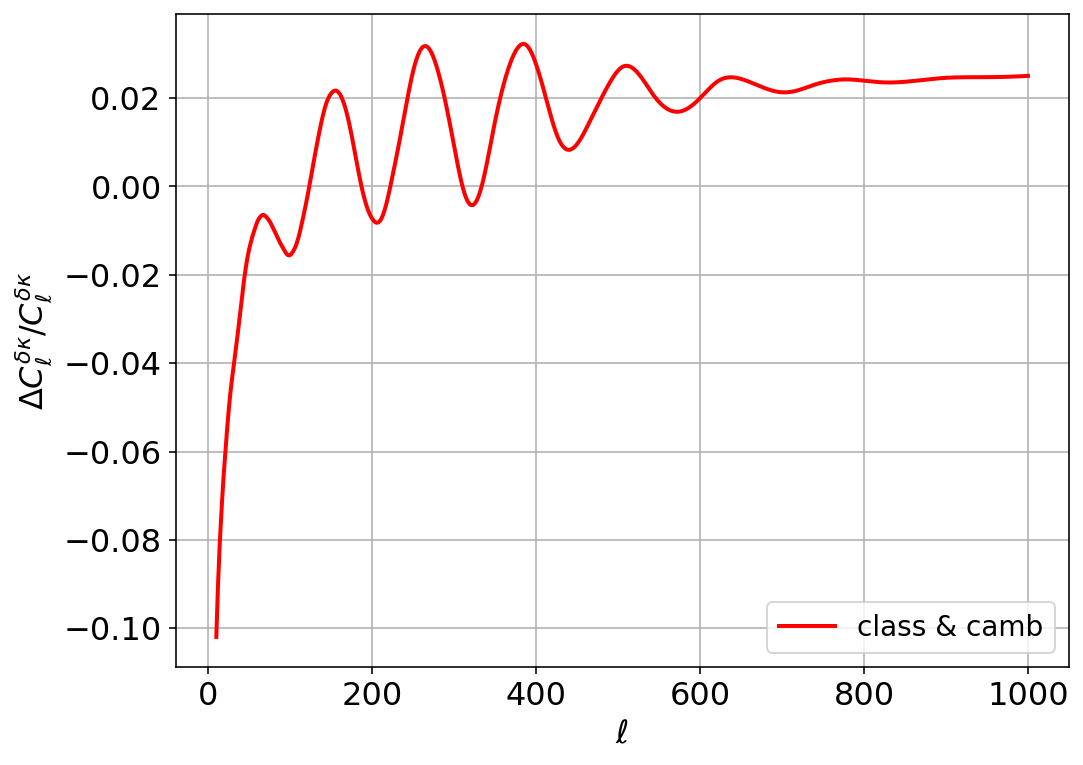

In [221]:
plt.plot(ll[10:],((ll[10:]*(ll[10:]+1))*cls_lensing_density['dl'][1][10:]/2 - cl_dl_intp)/cl_dl_intp,color='r',label='class & camb', linewidth=2)
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{\delta\kappa}/C_\ell^{\delta\kappa}$')
plt.legend(loc='lower right', fontsize=14)
plt.grid()